In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [3]:
## 设置属性防止中文乱码
mpl.rcParams['font.sans-serif'] = [u'SimHei']
mpl.rcParams['axes.unicode_minus'] = False

In [4]:
## 读取数据
# 'sepal length', 'sepal width', 'petal length', 'petal width'
iris_feature = u'花萼长度', u'花萼宽度', u'花瓣长度', u'花瓣宽度'
path = './datas/iris.data'  # 数据文件路径
data = pd.read_csv(path, header=None)
x, y = data[list(range(4))], data[4]
y = pd.Categorical(y).codes
x = x[[0, 1]]

In [5]:
## 数据分割
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=28, train_size=0.6)

C:\Software\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [6]:
## 数据SVM分类器构建
svm = SVC(C=1, kernel='linear')

## 模型训练
# svm有一个重要的瓶颈——当特征数大于样本数的时候，效果变差
svm.fit(x_train, y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [7]:
svm.intercept_

array([ 4.79987796,  6.63529625, 12.07494136])

In [8]:
## Linear分类器构建
lr = LogisticRegression()
# ridge是为了解决特征大于样本，而导致分类效果较差的情况，而提出的
rc = RidgeClassifier()  
# knn分类
knn = KNeighborsClassifier()

## 模型训练
lr.fit(x_train, y_train)
rc.fit(x_train, y_train)
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

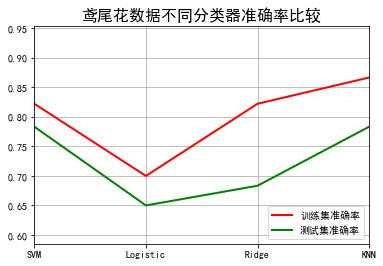

In [9]:
### 效果评估
svm_score1 = accuracy_score(y_train, svm.predict(x_train))
svm_score2 = accuracy_score(y_test, svm.predict(x_test))

lr_score1 = accuracy_score(y_train, lr.predict(x_train))
lr_score2 = accuracy_score(y_test, lr.predict(x_test))

rc_score1 = accuracy_score(y_train, rc.predict(x_train))
rc_score2 = accuracy_score(y_test, rc.predict(x_test))

knn_score1 = accuracy_score(y_train, knn.predict(x_train))
knn_score2 = accuracy_score(y_test, knn.predict(x_test))

## 画图
x_tmp = [0,1,2,3]
y_score1 = [svm_score1, lr_score1, rc_score1, knn_score1]
y_score2 = [svm_score2, lr_score2, rc_score2, knn_score2]

plt.figure(facecolor='w')
plt.plot(x_tmp, y_score1, 'r-', lw=2, label=u'训练集准确率')
plt.plot(x_tmp, y_score2, 'g-', lw=2, label=u'测试集准确率')
plt.xlim(0, 3)
plt.ylim(np.min((np.min(y_score1), np.min(y_score2)))*0.9, np.max((np.max(y_score1), np.max(y_score2)))*1.1)
plt.legend(loc = 'lower right')
plt.title(u'鸢尾花数据不同分类器准确率比较', fontsize=16)
plt.xticks(x_tmp, [u'SVM', u'Logistic', u'Ridge', u'KNN'], rotation=0)
plt.grid(b=True)
plt.show()

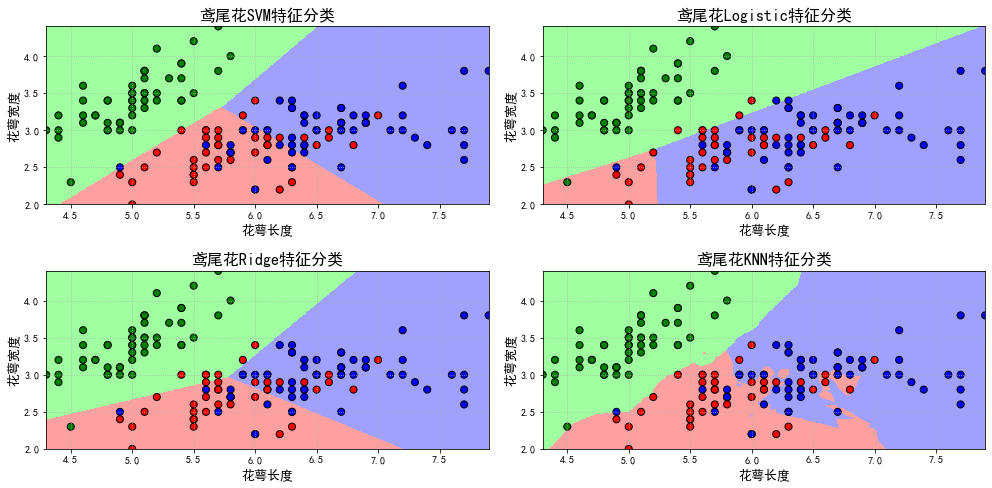

In [10]:
### 画图比较
N = 500
x1_min, x2_min = x.min()
x1_max, x2_max = x.max()

t1 = np.linspace(x1_min, x1_max, N)
t2 = np.linspace(x2_min, x2_max, N)
x1, x2 = np.meshgrid(t1, t2)  # 生成网格采样点
grid_show = np.dstack((x1.flat, x2.flat))[0] # 测试点

## 获取各个不同算法的测试值
svm_grid_hat = svm.predict(grid_show)
svm_grid_hat = svm_grid_hat.reshape(x1.shape)  # 使之与输入的形状相同

lr_grid_hat = lr.predict(grid_show)
lr_grid_hat = lr_grid_hat.reshape(x1.shape)  # 使之与输入的形状相同

rc_grid_hat = rc.predict(grid_show)
rc_grid_hat = rc_grid_hat.reshape(x1.shape)  # 使之与输入的形状相同

knn_grid_hat = knn.predict(grid_show)
knn_grid_hat = knn_grid_hat.reshape(x1.shape)  # 使之与输入的形状相同

## 画图
cm_light = mpl.colors.ListedColormap(['#A0FFA0', '#FFA0A0', '#A0A0FF'])
cm_dark = mpl.colors.ListedColormap(['g', 'r', 'b'])
plt.figure(facecolor='w', figsize=(14,7))

### svm
plt.subplot(221)
## 区域图
plt.pcolormesh(x1, x2, svm_grid_hat, cmap=cm_light)
## 所以样本点
plt.scatter(x[0], x[1], c=y, edgecolors='k', s=50, cmap=cm_dark)      # 样本
## 测试数据集
plt.scatter(x_test[0], x_test[1], s=120, facecolors='none', zorder=10)     # 圈中测试集样本
## lable列表
plt.xlabel(iris_feature[0], fontsize=13)
plt.ylabel(iris_feature[1], fontsize=13)
plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max)
plt.title(u'鸢尾花SVM特征分类', fontsize=16)
plt.grid(b=True, ls=':')
plt.tight_layout(pad=1.5)

plt.subplot(222)
## 区域图
plt.pcolormesh(x1, x2, lr_grid_hat, cmap=cm_light)
## 所以样本点
plt.scatter(x[0], x[1], c=y, edgecolors='k', s=50, cmap=cm_dark)      # 样本
## 测试数据集
plt.scatter(x_test[0], x_test[1], s=120, facecolors='none', zorder=10)     # 圈中测试集样本
## lable列表
plt.xlabel(iris_feature[0], fontsize=13)
plt.ylabel(iris_feature[1], fontsize=13)
plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max)
plt.title(u'鸢尾花Logistic特征分类', fontsize=16)
plt.grid(b=True, ls=':')
plt.tight_layout(pad=1.5)

plt.subplot(223)
## 区域图
plt.pcolormesh(x1, x2, rc_grid_hat, cmap=cm_light)
## 所以样本点
plt.scatter(x[0], x[1], c=y, edgecolors='k', s=50, cmap=cm_dark)      # 样本
## 测试数据集
plt.scatter(x_test[0], x_test[1], s=120, facecolors='none', zorder=10)     # 圈中测试集样本
## lable列表
plt.xlabel(iris_feature[0], fontsize=13)
plt.ylabel(iris_feature[1], fontsize=13)
plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max)
plt.title(u'鸢尾花Ridge特征分类', fontsize=16)
plt.grid(b=True, ls=':')
plt.tight_layout(pad=1.5)

plt.subplot(224)
## 区域图
plt.pcolormesh(x1, x2, knn_grid_hat, cmap=cm_light)
## 所以样本点
plt.scatter(x[0], x[1], c=y, edgecolors='k', s=50, cmap=cm_dark)      # 样本
## 测试数据集
plt.scatter(x_test[0], x_test[1], s=120, facecolors='none', zorder=10)     # 圈中测试集样本
## lable列表
plt.xlabel(iris_feature[0], fontsize=13)
plt.ylabel(iris_feature[1], fontsize=13)
plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max)
plt.title(u'鸢尾花KNN特征分类', fontsize=16)
plt.grid(b=True, ls=':')
plt.tight_layout(pad=1.5)

plt.show()